In [1]:
%matplotlib notebook
#%matplotlib inline
import sys
sys.path.append("../../CellTemplate")
import matplotlib.pyplot as plt
import os
import numpy as np
import json
import argparse
import torch
from torch.optim import lr_scheduler
from tqdm import tqdm
from data_loader import data_loaders as module_data
from model import loss as module_loss
from model import metric as module_metric
from model import model as module_arch
from trainer import Trainer
from utils import Logger
from utils import util
from utils import torchsummary
from utils import viewTraining
from utils import lr_finder
from utils import classActivationMap
import importlib
import math
import torchvision
from torch.nn import functional as F
from torch import topk
import skimage.transform
import jupyter
from IPython import display
from ipywidgets import *
from utils import hyperband as HypOpt
import argparse
print("Modules loaded")


importlib.reload(module_data) #load recent changes to data_loaders.py
importlib.reload(module_arch)
importlib.reload(module_loss)
importlib.reload(module_metric)
importlib.reload(util)
importlib.reload(viewTraining)
importlib.reload(lr_finder)
importlib.reload(classActivationMap)
importlib.reload(HypOpt)
print("Reload complete")

print("GPUs available: " + str(torch.cuda.device_count()))
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"

C:\Users\awoloshu\Documents\pytorch36\lib\site-packages\tqdm\autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


Modules loaded
Reload complete
GPUs available: 1


In [2]:
params = {
    "num_feature": [4, 8, 16,32],
    "batch_size": [4, 8, 16, 32, 64, 128, 256],
    #"optim_type": ['adam', 'sgd'],
    "lr": [0.00001, 0.1],
    "weight_decay": [0.00001, 0.01],
    "step_size": [20, 150],
    "gamma": [0.05, 0.5]
}

def get_instance(module, name, config, *args):
    return getattr(module, config[name]['type'])(*args, **config[name]['args'])

config_file = '..\\configs\\config_hdf5_hypop.json'

# load config file
with open(config_file) as handle:
    config = json.load(handle)
# setting path to save trained models and log files
path = os.path.join(config['trainer']['save_dir'], config['name'])
print("loaded")

args = argparse.ArgumentParser()
args.epoch_scale = 1
args.max_iter = 100
args.eta = 10
args.num_gpu = 1

loaded


Note: NumExpr detected 20 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


Total number of training images = 2071


<IPython.core.display.Javascript object>


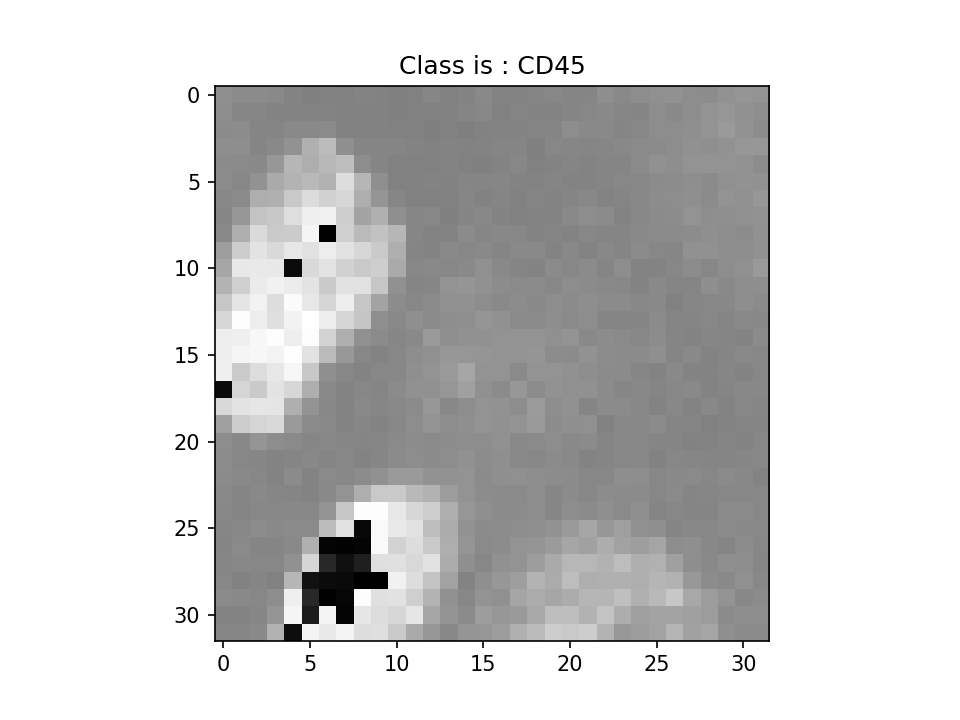

interactive(children=(IntSlider(value=0, description='layer', max=6), Output()), _dom_classes=('widget-interac…

In [3]:
data_loader = getattr(module_data, config['data_loader_test']['type'])(
    config['data_loader']['args']['hdf5_path'],
    batch_size=1,
    shuffle=True,
    validation_split=0.0,
    training=False,
    num_workers=0)
print("Total number of training images = " + str(data_loader.dataset.data_len))
valid_data_loader = data_loader.split_validation() #allocate some images as validation

normalized = False
util.visualizeBatch(data_loader, normalized) 

In [4]:
ho = HypOpt.HyperOptim(args, params, config)

[*] max_iter: 100, eta: 10, B: 300


In [ ]:
ho.tune()

s: 2
[*] 1/3 - running 100 configs for 1 iters each


  0%|          | 0/100 [00:00<?, ?it/s]C:\Users\awoloshu\Documents\pytorch36\lib\site-packages\sklearn\metrics\classification.py:1745: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
